In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"]=(15,5)
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [10]:
columns =['State','Account_Len','Area','Ph_No.','Int_Plan','Vmail_Plan','messgs',
            'tot_day_mins','tot_day_calls','tot_day_chrgs','tot_evening_mins',
            'tot_evening_calls','tot_evening_chrgs','tot_ngt_mins','tot_ngt_calls',
            'tot_ngt_chrgs','tot_int_mins','tot_int_calls','tot_int_chrgs',
'cust_calls_made','churn_status']

Tel_Churn = pd.read_csv("churn.txt",names=columns)

Tel_Churn.head()

,State,Account_Len,Area,Ph_No.,Int_Plan,Vmail_Plan,messgs,tot_day_mins,tot_day_calls,tot_day_chrgs,...,tot_evening_calls,tot_evening_chrgs,tot_ngt_mins,tot_ngt_calls,tot_ngt_chrgs,tot_int_mins,tot_int_calls,tot_int_chrgs,cust_calls_made,churn_status
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [11]:
#Data pre-processing: from strings to numbers
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(["False.", "True."])
Tel_Churn["churn_status"]  = le.transform(Tel_Churn["churn_status"])

le = preprocessing.LabelEncoder()
le.fit(["yes", "no"])
Tel_Churn["Int_Plan"]  = le.transform(Tel_Churn["Int_Plan"])

le = preprocessing.LabelEncoder()
le.fit(["yes", "no"])
Tel_Churn["Vmail_Plan"]  = le.transform(Tel_Churn["Vmail_Plan"])

In [12]:
Tel_Churn.head()

,State,Account_Len,Area,Ph_No.,Int_Plan,Vmail_Plan,messgs,tot_day_mins,tot_day_calls,tot_day_chrgs,...,tot_evening_calls,tot_evening_chrgs,tot_ngt_mins,tot_ngt_calls,tot_ngt_chrgs,tot_int_mins,tot_int_calls,tot_int_chrgs,cust_calls_made,churn_status
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [13]:
# Now check the unique values
print(Tel_Churn.Int_Plan.unique())
print(Tel_Churn.Vmail_Plan.unique())
print(Tel_Churn.churn_status.unique())

[0 1]
[1 0]
[0 1]


# Data Exploration

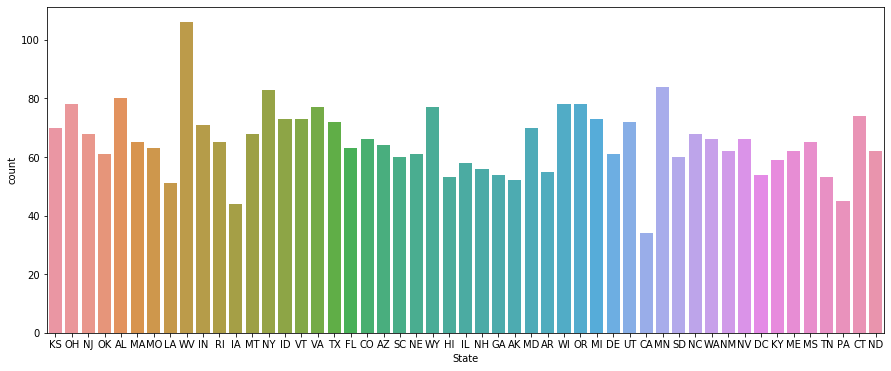

In [14]:
plt.rcParams['figure.figsize']=(15,6)
sns.countplot(x="State", data=Tel_Churn)#Count by country

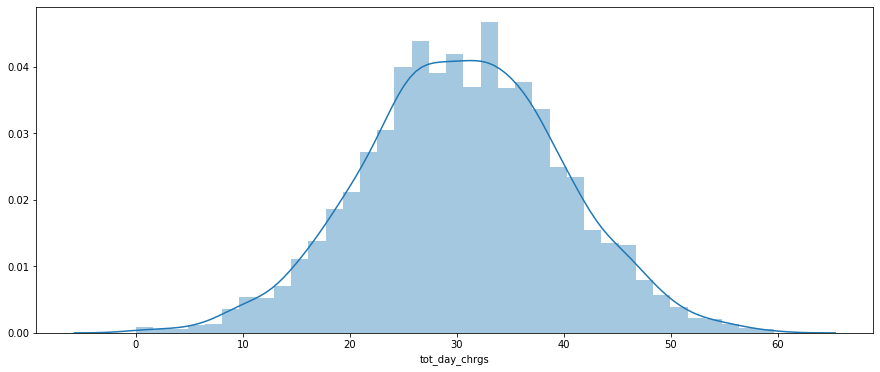

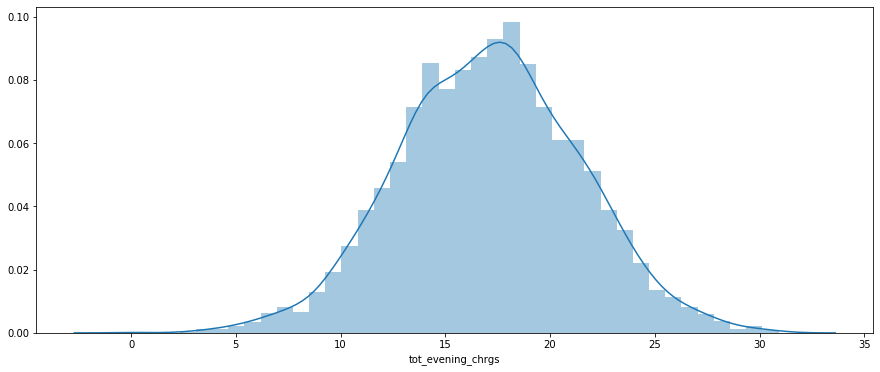

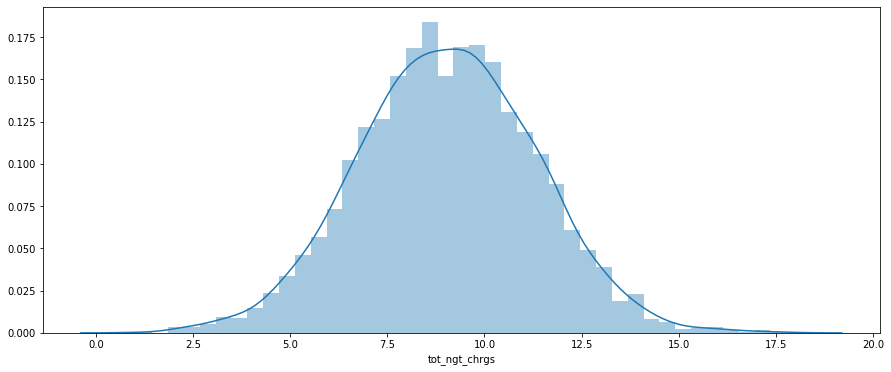

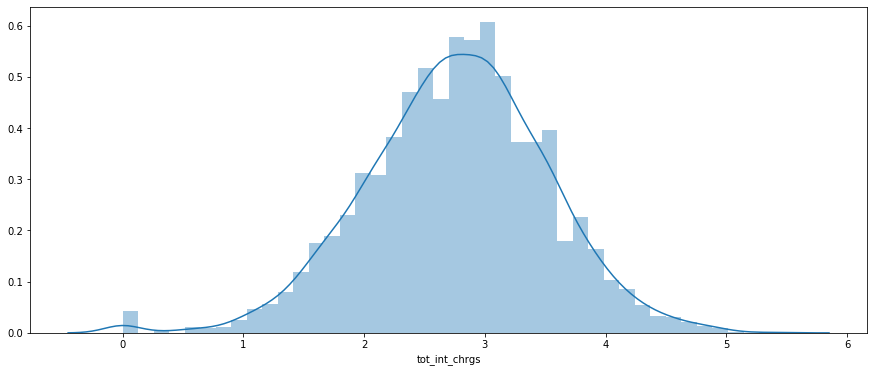

In [15]:
sns.distplot(Tel_Churn.tot_day_chrgs)
plt.show()
sns.distplot(Tel_Churn.tot_evening_chrgs)
plt.show()
sns.distplot(Tel_Churn.tot_ngt_chrgs)
plt.show()
sns.distplot(Tel_Churn.tot_int_chrgs)
plt.show()

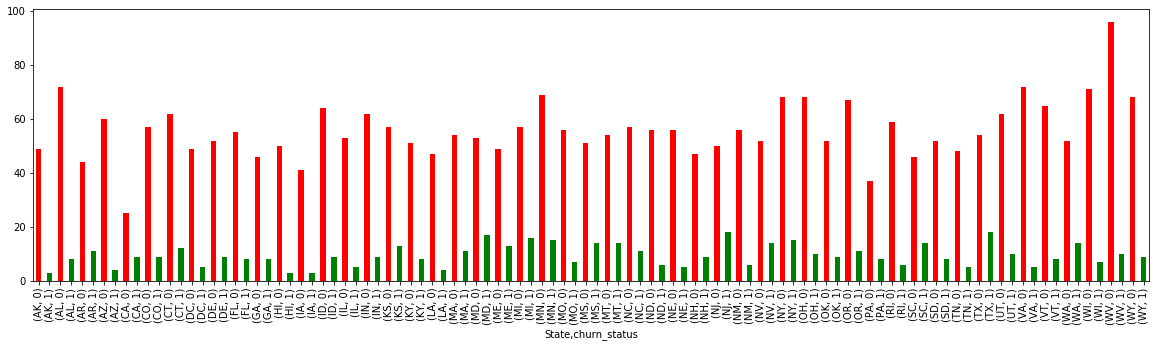

In [16]:
plt.rcParams["figure.figsize"]=(20,5)
var = Tel_Churn.groupby(["State","churn_status"]).churn_status.count()#Churn vs. No Churn by State
var.plot(kind="bar",color=["red","green"])

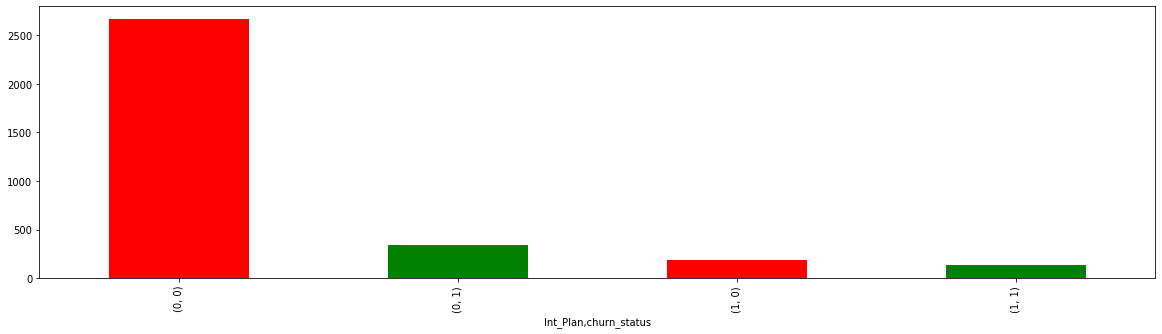

In [17]:
Int_Plan = Tel_Churn.groupby(["Int_Plan","churn_status"]).churn_status.count() #Churn vs. No Churn by International Plan
Int_Plan.plot(kind="bar",color=["red","green"])

# Data split

In [18]:
feature_cols =['Account_Len','Area','Int_Plan','Vmail_Plan','messgs',
            'tot_day_mins','tot_day_calls','tot_day_chrgs','tot_evening_mins',
            'tot_evening_calls','tot_evening_chrgs','tot_ngt_mins','tot_ngt_calls',
            'tot_ngt_chrgs','tot_int_mins','tot_int_calls','tot_int_chrgs',
'cust_calls_made']

X = Tel_Churn[feature_cols]
y = Tel_Churn.churn_status

In [20]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y= train_test_split(X,y,test_size=0.3,random_state=45)

print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(2333, 18)
(1000, 18)
(2333,)
(1000,)


# Perform Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_X,train_Y)
logreg_pred = logreg.predict(test_X)

from sklearn.metrics import precision_score, recall_score
precision_score = round(precision_score(test_Y, logreg_pred), 2)
recall_score = round(recall_score(test_Y, logreg_pred), 2)
print("Precision: " + str(precision_score))
print("Recall: " + str(recall_score))

from sklearn import metrics
cnf_matrix = (metrics.confusion_matrix(test_Y,logreg_pred))
cnf_matrix

Precision: 0.48
Recall: 0.2


C:\ProgramData\Miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[833,  30],
       [109,  28]], dtype=int64)

# Perform Decision Tree

In [22]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(criterion="entropy",max_depth=3)

tree.fit(train_X,train_Y)
tree_Pred = tree.predict(test_X).astype(int)


from sklearn.metrics import precision_score, recall_score
precision_score = round(precision_score(test_Y, tree_Pred), 2)
recall_score = round(recall_score(test_Y, tree_Pred), 2)
print("Precision: " + str(precision_score))
print("Recall: " + str(recall_score))

cnf_matrix = (metrics.confusion_matrix(test_Y,tree_Pred))
cnf_matrix

Precision: 0.85
Recall: 0.34


array([[855,   8],
       [ 91,  46]], dtype=int64)

# Random Forest Tree

In [23]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth = 3, min_samples_split=2, n_estimators = 200, random_state = 1)

forest.fit(train_X,train_Y)
forest_Pred = forest.predict(test_X).astype(int)

from sklearn.metrics import precision_score, recall_score
precision_score = round(precision_score(test_Y, forest_Pred), 2)
recall_score = round(recall_score(test_Y, forest_Pred), 2)
print("Precision: " + str(precision_score))
print("Recall: " + str(recall_score))

cnf_matrix = (metrics.confusion_matrix(test_Y,forest_Pred))
cnf_matrix

Precision: 0.92
Recall: 0.18


array([[861,   2],
       [113,  24]], dtype=int64)

In [24]:
#Credits for the original notebook: https://github.com/niranjannahak